# Omicrons - US Presidential Election Analysis

---
## Demographics Analysis
### Findings:
- Data analyzed: Total voting population, Gender participation, Race participation, Age Ranges participation.
- For the ranges 25 to 44 and 45 to 64 years old, we’ll experience a growth in participation around 1%, while the ranges for 18 to 24 and 65 and over, an almost nil change will be perceived (growth and decrease are no larger than 1% respectively).
- Change in participation for races include White, White non-Hispanic, Black, Asian and Pacific Islander and Hispanics.
- Predicted change won’t be perceived in this section as no more than 1% would be realized, except for Hispanics.

In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt

## Calculations for total voting population

In [2]:
file_import = os.path.join("Resources","Total_vote.csv")

In [3]:
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Total_vote = pd.DataFrame(csv_reader, columns = csv_header)

In [4]:
Total_vote

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,Total voting age,245502,235248,225499,215694,202609,193651,185684,178098,169963,157085,146548
1,Total voted,137537,132948,131144,125736,110826,105017,113866,102224,101878,93066,86698
2,Percent voted,56,56.5,58.2,58.3,54.7,54.2,61.3,57.4,59.9,59.2,59.2


In [5]:
id_vars=['2016','2012', '2008', '2004', '2000', '1996', '1992', '1988', '1984', '1980', '1976']

In [6]:
cols = ['Total voting age', 'Total voted', 'Percent voted']

In [7]:
Total_vote = Total_vote.transpose(copy = True)

In [8]:
Total_vote.columns = Total_vote.iloc[0]
Total_vote = Total_vote.drop(Total_vote.index[0])

In [9]:
Total_vote

,Total voting age,Total voted,Percent voted
2016,245502,137537,56
2012,235248,132948,56.5
2008,225499,131144,58.2
2004,215694,125736,58.3
2000,202609,110826,54.7
1996,193651,105017,54.2
1992,185684,113866,61.3
1988,178098,102224,57.4
1984,169963,101878,59.9
1980,157085,93066,59.2


In [10]:
Total_vote.dtypes


Total voting age    object
Total voted         object
Percent voted       object
dtype: object

In [11]:
Total_vote = Total_vote.apply(pd.to_numeric)
Total_vote.dtypes


Total voting age      int64
Total voted           int64
Percent voted       float64
dtype: object

In [12]:
def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

In [13]:
iterations = [0,1,2]

In [14]:
for i in iterations:
    start_value = float(Total_vote.iloc[0, i])
    end_value = float(Total_vote.iloc[-1, i])
    num_periods = len(Total_vote)
    print(f'Predicted growth in 2020 for {Total_vote.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for Total voting age is of -0.05028677406890514
Predicted growth in 2020 for Total voted is of -0.04509766966757811
Predicted growth in 2020 for Percent voted is of 0.005572453797072052


## Calculations for age participation

In [15]:
file_import = os.path.join("Resources","Age_participation.csv")
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Age_part = pd.DataFrame(csv_reader, columns = csv_header)

In [16]:
Age_part

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,18 to 24 years,39.4,38,44.3,41.9,32.3,32.4,42.8,36.2,40.8,39.9,42.2
1,25 to 44 years,48.97788504,49.5,51.9,52.2,49.8,49.2,58.3,54,58.4,58.7,58.7
2,45 to 64 years,61.7,63.4,65,66.6,64.1,64.4,70,67.9,69.8,69.3,68.7
3,65 years and over,68.42905267,69.7,68.1,68.9,67.6,67,70.1,68.8,67.7,65.1,62.2


In [17]:
YearAge2016=Age_part['2016']
YearAge2012=Age_part['2012']
YearAge2008=Age_part['2008']
YearAge2004=Age_part['2004']
YearAge2000=Age_part['2000']
YearAge1996=Age_part['1996']
YearAge1992=Age_part['1992']
YearAge1988=Age_part['1988']
YearAge1984=Age_part['1984']
YearAge1980=Age_part['1980']
YearAge1976=Age_part['1976']

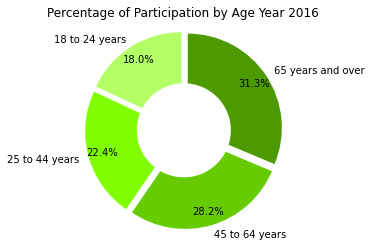

In [18]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge2016
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 2016")
plt.savefig("./Images/Age2016.png")
plt.show()

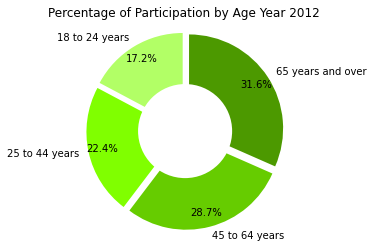

In [19]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge2012
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 2012")
plt.savefig("./Images/Age2012.png")
plt.show()

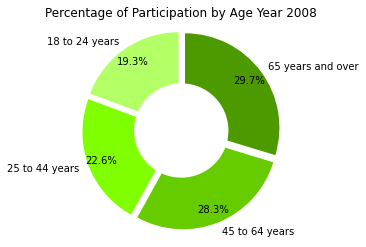

In [20]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge2008
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 2008")
plt.savefig("./Images/Age2008.png")
plt.show()

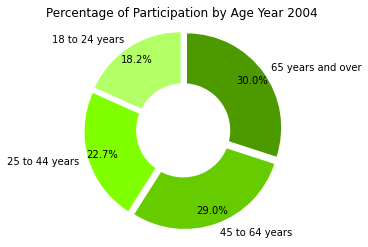

In [21]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge2004
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 2004")
plt.savefig("./Images/Age2004.png")
plt.show()

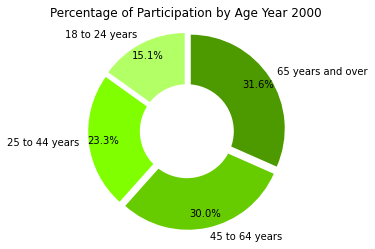

In [22]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge2000
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 2000")
plt.savefig("./Images/Age2000.png")
plt.show()

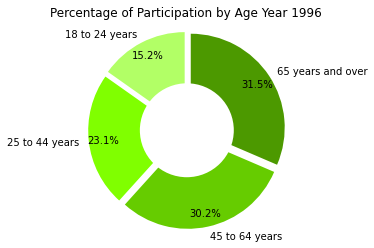

In [23]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge1996
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 1996")
plt.savefig("./Images/Age1996.png")
plt.show()

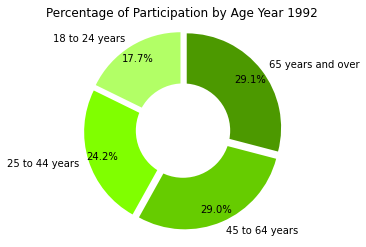

In [24]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge1992
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 1992")
plt.savefig("./Images/Age1992.png")
plt.show()

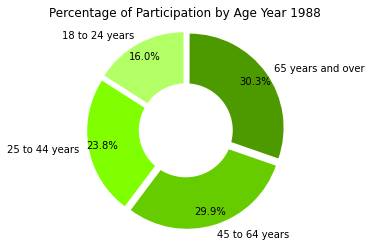

In [25]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge1988
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 1988")
plt.savefig("./Images/Age1988.png")
plt.show()

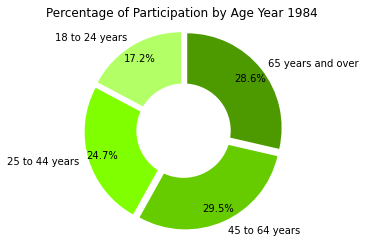

In [26]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge1984
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 1984")
plt.savefig("./Images/Age1984.png")
plt.show()

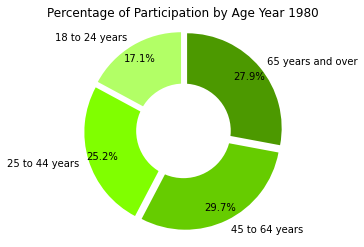

In [27]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge1980
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 1980")
plt.savefig("./Images/Age1980.png")
plt.show()

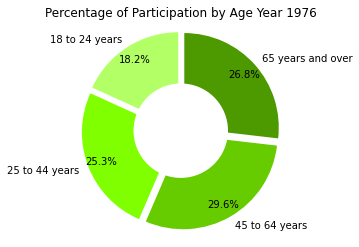

In [28]:
# Age Plot BY YEAR
labels=["18 to 24 years","25 to 44 years","45 to 64 years","65 years and over"]
sizes=YearAge1976
colors = ['#B2FF66','#80FF00','#66CC00','#4C9900']                         
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Age Year 1976")
plt.savefig("./Images/Age1976.png")
plt.show()

In [29]:
Age_part = Age_part.set_index(Age_part.columns[0])

In [30]:
Age_part

,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
,,,,,,,,,,,
18 to 24 years,39.4,38,44.3,41.9,32.3,32.4,42.8,36.2,40.8,39.9,42.2
25 to 44 years,48.97788504,49.5,51.9,52.2,49.8,49.2,58.3,54,58.4,58.7,58.7
45 to 64 years,61.7,63.4,65,66.6,64.1,64.4,70,67.9,69.8,69.3,68.7
65 years and over,68.42905267,69.7,68.1,68.9,67.6,67,70.1,68.8,67.7,65.1,62.2


In [31]:
Age_part = Age_part.apply(pd.to_numeric)
Age_part.dtypes

2016    float64
2012    float64
2008    float64
2004    float64
2000    float64
1996    float64
1992    float64
1988    float64
1984    float64
1980    float64
1976    float64
dtype: object

In [32]:
Age_part = Age_part.transpose(copy = True)


In [33]:
Age_part

,18 to 24 years,25 to 44 years,45 to 64 years,65 years and over
2016,39.4,48.977885,61.7,68.429053
2012,38.0,49.500000,63.4,69.700000
2008,44.3,51.900000,65.0,68.100000
2004,41.9,52.200000,66.6,68.900000
2000,32.3,49.800000,64.1,67.600000
1996,32.4,49.200000,64.4,67.000000
1992,42.8,58.300000,70.0,70.100000
1988,36.2,54.000000,67.9,68.800000
1984,40.8,58.400000,69.8,67.700000
1980,39.9,58.700000,69.3,65.100000


In [34]:
iterations = [0,1,2,3]

In [35]:
for i in iterations:
    start_value = float(Age_part.iloc[0, i])
    end_value = float(Age_part.iloc[-1, i])
    num_periods = len(Age_part)
    print(f'Predicted growth in 2020 for {Age_part.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for 18 to 24 years is of 0.006889061635877214
Predicted growth in 2020 for 25 to 44 years is of 0.018272012853188357
Predicted growth in 2020 for 45 to 64 years is of 0.010804478156951625
Predicted growth in 2020 for 65 years and over is of -0.009498846354683899


## Calculations for gender participation

In [36]:
file_import = os.path.join("Resources","Gender_participation.csv")
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Gender_part = pd.DataFrame(csv_reader, columns = csv_header)

In [37]:
Gender_part

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,Male,53.8,54.4,55.7,56.3,53.1,52.8,60.2,56.4,59,59.1,59.6
1,Female,58.1,58.5,60.4,60.1,56.2,55.5,62.3,58.3,60.8,59.4,58.8


In [38]:
Gender_part.shape
YearGender2016=Gender_part['2016']
YearGender2012=Gender_part['2012']
YearGender2008=Gender_part['2008']
YearGender2004=Gender_part['2004']
YearGender2000=Gender_part['2000']
YearGender1996=Gender_part['1996']
YearGender1992=Gender_part['1992']
YearGender1988=Gender_part['1988']
YearGender1984=Gender_part['1984']
YearGender1980=Gender_part['1980']
YearGender1976=Gender_part['1976']

In [39]:
Gender_part = Gender_part.set_index(Gender_part.columns[0])

In [40]:
Gender_part

,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
,,,,,,,,,,,
Male,53.8,54.4,55.7,56.3,53.1,52.8,60.2,56.4,59,59.1,59.6
Female,58.1,58.5,60.4,60.1,56.2,55.5,62.3,58.3,60.8,59.4,58.8


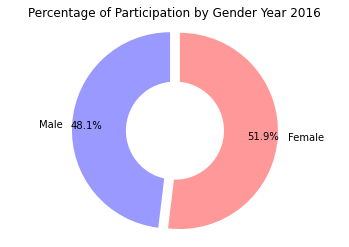

In [41]:
labels=["Male","Female"]
sizes=YearGender2016
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 2016")
plt.savefig("./Images/Gender2016.png")
plt.show()

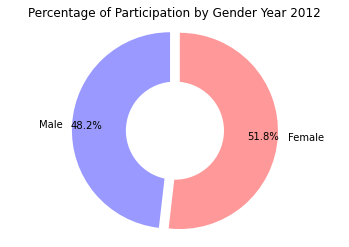

In [42]:
labels=["Male","Female"]
sizes=YearGender2012
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 2012")
plt.savefig("./Images/Gender2012.png")
plt.show()

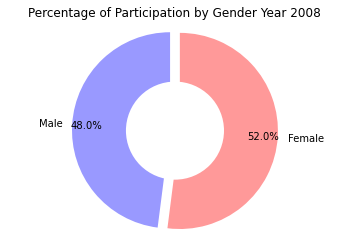

In [43]:
labels=["Male","Female"]
sizes=YearGender2008
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 2008")
plt.savefig("./Images/Gender2008.png")
plt.show()

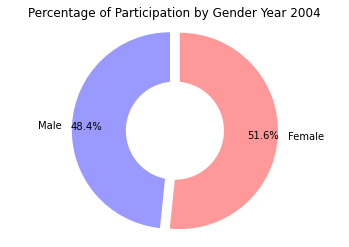

In [44]:
labels=["Male","Female"]
sizes=YearGender2004
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 2004")
plt.savefig("./Images/Gender2004.png")
plt.show()

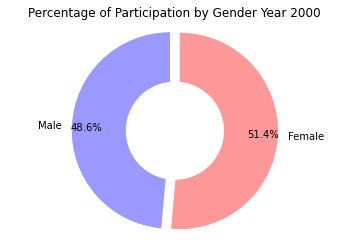

In [45]:
labels=["Male","Female"]
sizes=YearGender2000
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 2000")
plt.savefig("./Images/Gender2000.png")
plt.show()

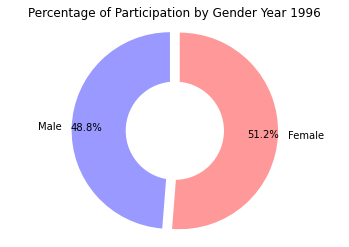

In [46]:
labels=["Male","Female"]
sizes=YearGender1996
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 1996")
plt.savefig("./Images/Gender1996.png")
plt.show()

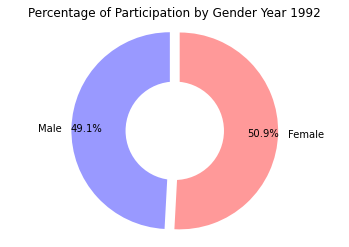

In [47]:
labels=["Male","Female"]
sizes=YearGender1992
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 1992")
plt.savefig("./Images/Gender1992.png")
plt.show()

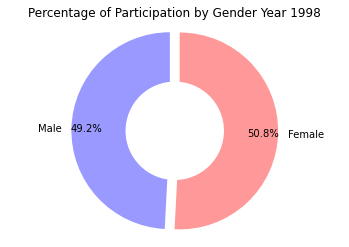

In [48]:
labels=["Male","Female"]
sizes=YearGender1988
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 1998")
plt.savefig("./Images/Gender1998.png")
plt.show()

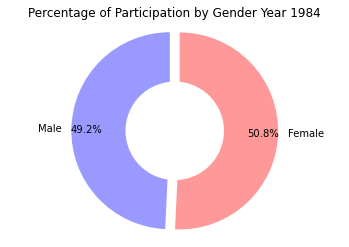

In [49]:
labels=["Male","Female"]
sizes=YearGender1984
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 1984")
plt.savefig("./Images/Gender1984.png")
plt.show()

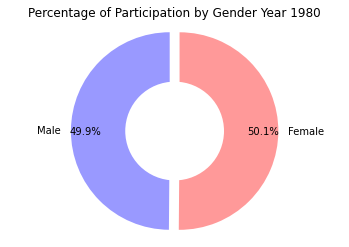

In [50]:
labels=["Male","Female"]
sizes=YearGender1980
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 1980")
plt.savefig("./Images/Gender1980.png")
plt.show()

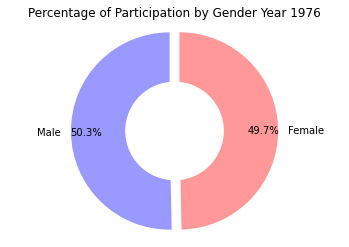

In [51]:
labels=["Male","Female"]
sizes=YearGender1976
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.title("Percentage of Participation by Gender Year 1976")
plt.savefig("./Images/Gender1976.png")
plt.show()

In [52]:
Gender_part = Gender_part.transpose(copy = True)

In [53]:
Gender_part

,Male,Female
2016,53.8,58.1
2012,54.4,58.5
2008,55.7,60.4
2004,56.3,60.1
2000,53.1,56.2
1996,52.8,55.5
1992,60.2,62.3
1988,56.4,58.3
1984,59,60.8
1980,59.1,59.4


In [54]:
import numpy as np

In [55]:
iterations = (np.arange(0, len(Gender_part.columns)))

In [56]:
for i in iterations:
    start_value = float(Gender_part.iloc[0, i])
    end_value = float(Gender_part.iloc[-1, i])
    num_periods = len(Gender_part)
    print(f'Predicted growth in 2020 for {Gender_part.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for Male is of 0.010290800491351115
Predicted growth in 2020 for Female is of 0.0011983365368064547


## Calculations for race participation

In [57]:
file_import = os.path.join("Resources","Race_participation.csv")
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Race_part = pd.DataFrame(csv_reader, columns = csv_header)

In [58]:
Race_part

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,White,58.2,57.6,59.6,60.3,56.4,56,63.6,59.1,61.4,60.9,60.9
1,White non-Hispanic,64.1,63,64.8,65.8,60.4,59.6,66.9,61.8,63.3,62.8,0
2,Black,55.9,62,60.8,56.3,53.5,50.6,54,51.5,55.8,50.5,48.7
3,Asian and Pacific Islander,33.9,31.3,32.1,29.8,25.4,25.7,27.3,0,0,0,0
4,Hispanic (of any race),32.5,31.8,31.6,28,27.5,26.7,28.9,28.8,32.6,29.9,31.8


In [59]:
Year2016Race=Race_part['2016']
Year2012Race=Race_part['2012']
Year2008Race=Race_part['2008']
Year2004Race=Race_part['2004']
Year2000Race=Race_part['2000']
Year1996Race=Race_part['1996']
Year1992Race=Race_part['1992']
Year1988Race=Race_part['1988']
Year1984Race=Race_part['1984']
Year1980Race=Race_part['1980']
Year1976Race=Race_part['1976']

In [60]:
Race_part = Race_part.set_index(Race_part.columns[0])

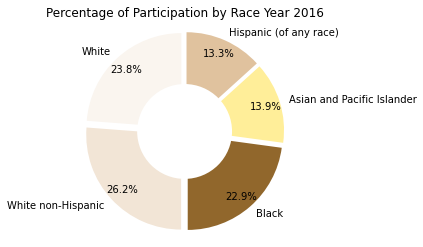

In [61]:
#Race PlotYear
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year2016Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 2016")
plt.savefig("./Images/Race2016.png")
plt.show()

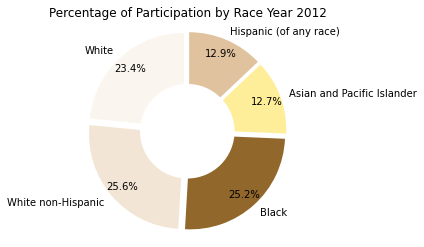

In [62]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year2012Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 2012")
plt.savefig("./Images/Race2012.png")
plt.show()

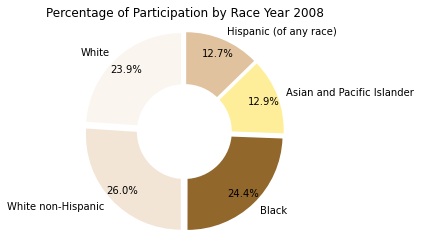

In [63]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year2008Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 2008")
plt.savefig("./Images/Race2008.png")
plt.show()

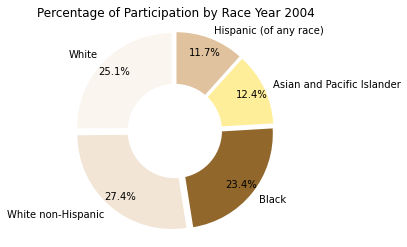

In [64]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year2004Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 2004")
plt.savefig("./Images/Race2004.png")
plt.show()

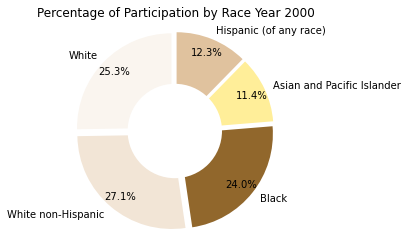

In [65]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year2000Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 2000")
plt.savefig("./Images/Race2000.png")
plt.show()

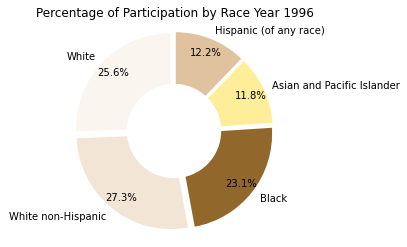

In [66]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year1996Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 1996")
plt.savefig("./Images/Race1996.png")
plt.show()

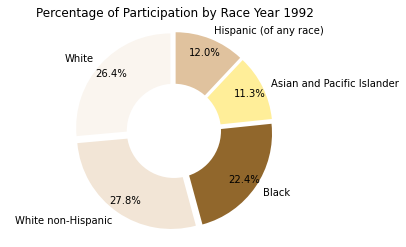

In [67]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year1992Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 1992")
plt.savefig("./Images/Race1992.png")
plt.show()

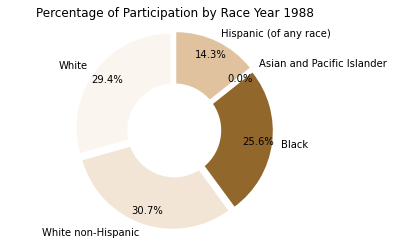

In [68]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year1988Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 1988")
plt.savefig("./Images/Race1988.png")
plt.show()

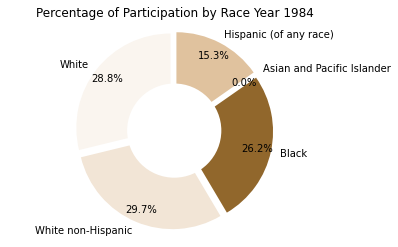

In [69]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year1984Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 1984")
plt.savefig("./Images/Race1984.png")
plt.show()

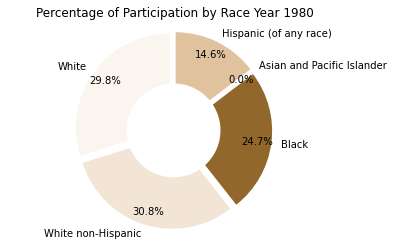

In [70]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year1980Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 1980")
plt.savefig("./Images/Race1980.png")
plt.show()

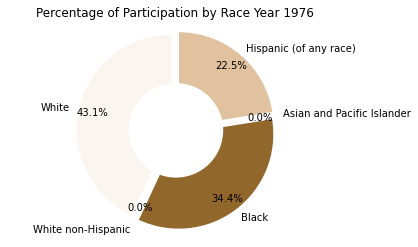

In [71]:
#Race
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=Year1976Race
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.title("Percentage of Participation by Race Year 1976")
plt.savefig("./Images/Race1976.png")
plt.show()

In [72]:
Race_part = Race_part.apply(pd.to_numeric)
Race_part.dtypes

2016    float64
2012    float64
2008    float64
2004    float64
2000    float64
1996    float64
1992    float64
1988    float64
1984    float64
1980    float64
1976    float64
dtype: object

In [73]:
Race_part = Race_part.transpose(copy = True)
Race_part

,White,White non-Hispanic,Black,Asian and Pacific Islander,Hispanic (of any race)
2016,58.2,64.1,55.9,33.9,32.5
2012,57.6,63.0,62.0,31.3,31.8
2008,59.6,64.8,60.8,32.1,31.6
2004,60.3,65.8,56.3,29.8,28.0
2000,56.4,60.4,53.5,25.4,27.5
1996,56.0,59.6,50.6,25.7,26.7
1992,63.6,66.9,54.0,27.3,28.9
1988,59.1,61.8,51.5,0.0,28.8
1984,61.4,63.3,55.8,0.0,32.6
1980,60.9,62.8,50.5,0.0,29.9


In [74]:
iterations = (np.arange(0, len(Race_part.columns)))
for i in iterations:
    start_value = float(Race_part.iloc[0, i])
    end_value = float(Race_part.iloc[6, i])
    num_periods = len(Race_part)
    print(f'Predicted growth in 2020 for {Race_part.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for White  is of 0.008912291633392133
Predicted growth in 2020 for White non-Hispanic is of 0.004284613140757232
Predicted growth in 2020 for Black is of -0.0034520612482230595
Predicted growth in 2020 for Asian and Pacific Islander is of -0.02142009152080593
Predicted growth in 2020 for Hispanic (of any race) is of -0.011671206272178658


### CAGR method extracted from :
https://towardsdatascience.com/python-vs-excel-compound-annual-growth-rate-cagr-c8dbad46d3e0

Made with Data from: 
US Census